In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-adapt-usage)

We'll integrate the function from {numref}`Demo %s <demo-adapt-motive>`.

In [2]:
f = x -> (x + 1)^2 * cos((2x + 1) / (x - 4.3));

We perform the integration and show the nodes selected underneath the curve.

num_nodes = length(t) = 69

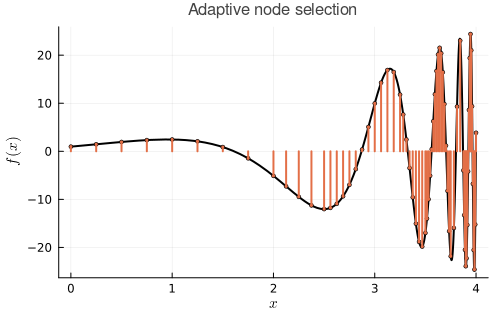

In [3]:
A, t = FNC.intadapt(f, 0, 4, 0.001)
@show num_nodes = length(t);

plot(f, 0, 4;
    color=:black, legend=:none,
    xlabel=L"x",  ylabel=L"f(x)", 
    title="Adaptive node selection")
plot!(t, f.(t), seriestype=:sticks, m=(:o, 2))

The error turns out to be a bit more than we requested. It's only an estimate, not a guarantee.

In [4]:
using QuadGK
Q, _ = quadgk(f, 0, 4, atol=1e-14, rtol=1e-14);    # 'exact' value
println("error: $(Q-A)");

error: -0.022002813037627522


Let's see how the number of integrand evaluations and the error vary with the requested tolerance.

In [5]:
tol = [1 / 10^k for k in 4:14]
err, n = [], []
for tol in 10.0 .^ (-4:-1:-14)
    A, t = FNC.intadapt(f, 0, 4, tol)
    push!(err, Q - A)
    push!(n, length(t))
end
@pt :header=["tolerance", "error", "number of nodes"] [tol err n][1:2:end, :]

tolerance,error,number of nodes
0.0001,-0.000419469,113
1.0e-6,6.31438e-6,297
1.0e-8,7.18081e-8,757
1.0e-10,-8.44127e-10,2009
1.0e-12,4.04459e-11,4797
1.0e-14,1.62537e-13,12609


As you can see, even though the errors are not smaller than the tolerances, the two columns decrease in tandem. If we consider now the convergence not in $h$, which is poorly defined now, but in the number of nodes actually chosen, we come close to the fourth-order accuracy of the underlying Simpson scheme.

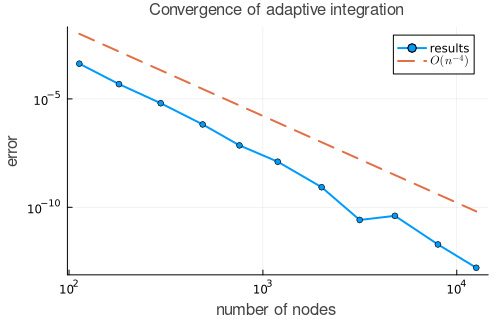

In [6]:
plot(n, abs.(err);
    m=:o, label="results",
    xaxis=(:log10, "number of nodes"),  yaxis=(:log10, "error"),
    title="Convergence of adaptive integration")

order4 = @. 0.01 * (n / n[1])^(-4)
plot!(n, order4, l=:dash, label=L"O(n^{-4})")